#Downloading the Dataset

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kairavnandi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction


100%|██████████| 4.63k/4.63k [00:00<00:00, 2.50MB/s]

#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

#Converting the Dataset into a Dataframe to perform operations

In [75]:
df = pd.read_csv("/content/housing-price-prediction/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [77]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


#Converting Categorical into Nurmerical Features

In [78]:
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
  df[col] = df[col].map({'yes':1, 'no':0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished':-1, 'semi-furnished':0, 'furnished':1})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


#Normalising Using MinMax Scaling

In [86]:
df['price'] = (df['price']-df['price'].min())/(df['price'].max()-df['price'].min())
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,7420,4,2,3,1,0,0,0,1,2,1,1
1,0.909091,8960,4,4,4,1,0,0,0,1,3,0,1
2,0.909091,9960,3,2,2,1,0,1,0,0,2,1,0
3,0.906061,7500,4,2,2,1,0,1,0,1,3,1,1
4,0.836364,7420,4,1,2,1,1,1,0,1,2,0,1


#Splitting Data and Training Model

In [87]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df['price']

In [88]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
model = lr()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", round(mae(y_test, y_pred), 2))
print("Mean Squared Error:", round(mse(y_test, y_pred), 2))
print("R2 Score:", round(r2(y_test, y_pred), 2))

Mean Absolute Error: 0.08
Mean Squared Error: 0.01
R2 Score: 0.65


#Plotting Model Accuracy

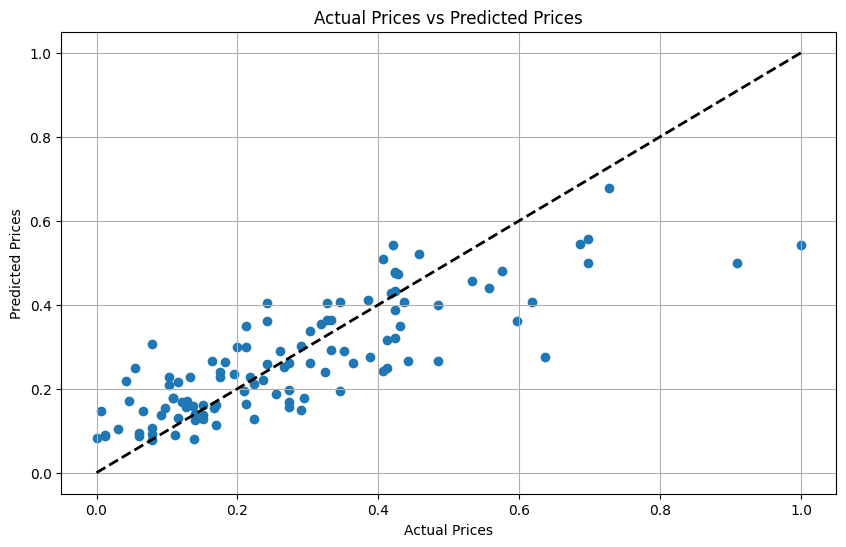

In [89]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],'k--', lw = 2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.grid(True)
plt.show()